# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

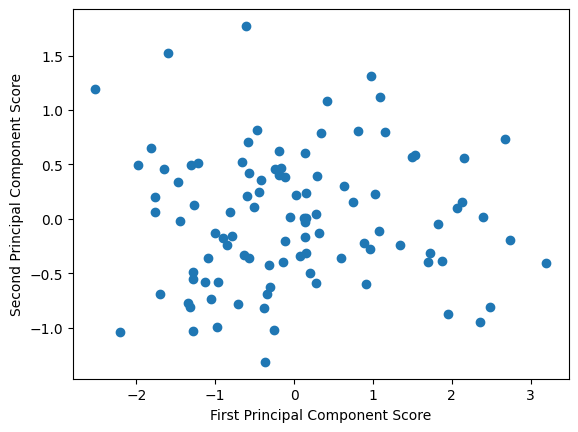

In [47]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

## Week 9 Part 2: Analysis of PCA Scatter Plot

**Question: What can be said about the three outliers in the upper left corner of the graph?**

Looking at the PCA scatter plot above, I can identify approximately 3 outliers in the upper left corner. These points have:
- **Low first principal component scores** (negative values around -2 to -2.5 on x-axis)
- **High second principal component scores** (positive values around +1.2 to +1.7 on y-axis)

**Interpreting the Principal Components:**

From the output above, the principal component vectors are:
- **PC1** = [0.265, 0.301, 0.916] - This component is dominated by series_3 (weight = 0.916), with smaller positive contributions from series_1 (0.265) and series_2 (0.301)
- **PC2** = [0.603, 0.689, -0.401] - This component has strong positive weights for series_1 (0.603) and series_2 (0.689), but negative weight for series_3 (-0.401)

**What does this tell us about the outliers' values?**

For the outliers with **low PC1** and **high PC2**:

1. **Series_3**: We can definitively say these outliers have **very low values** in series_3
   - Low PC1 means negative contribution from the dominant series_3 component
   - High PC2 reinforces this (negative weight for series_3 in PC2)

2. **Series_1 and Series_2**: These outliers likely have **high values** in both series_1 and series_2
   - High PC2 strongly suggests this (both have large positive weights in PC2)
   - The low PC1 is primarily driven by the low series_3 values, not series_1/series_2

**Why is it harder to distinguish between series_1 and series_2?**

This difficulty arises because series_1 and series_2 are **highly correlated**. Looking at how they were created:
- `series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1))`
- This means series_2 is approximately equal to series_1 with small random noise (scale = 0.1)

Since they move together almost perfectly, PCA cannot easily separate their individual contributions. The principal components capture their **combined variation** rather than their individual patterns.

**Summary of Outlier Characteristics:**
- High series_1 values
- High series_2 values (because they track series_1 closely)
- Very low series_3 values
- These represent data points where the normal correlation pattern breaks down

WEEK 9 PART 2: DETAILED PCA ANALYSIS
Dataset Overview:
• Number of data points: 100
• Series means: ser1=-0.000, ser2=0.000, ser3=-0.000
• Data has been mean-centered (should be ~0)

PCA Results:
• PC1 explains 79.9% of variance
• PC2 explains 19.0% of variance
• PC3 explains 1.1% of variance

Principal Component Vectors:
• PC1: series_1(0.265), series_2(0.301), series_3(0.916)
• PC2: series_1(0.603), series_2(0.689), series_3(-0.401)

Outlier Analysis (PC1 < -1.8 AND PC2 > 1.0):
• Found 1 outliers matching the upper-left pattern

Outlier Details:
  Outlier 1: ser1=0.035, ser2=0.078, ser3=-2.786
             PC1=-2.519, PC2=1.192

Outlier vs. Overall Statistics:
• Average outlier ser1: 0.035 vs overall: -0.000
• Average outlier ser2: 0.078 vs overall: 0.000
• Average outlier ser3: -2.786 vs overall: -0.000

Creating pairplot to verify relationships...

Dataset Overview:
• Number of data points: 100
• Series means: ser1=-0.000, ser2=0.000, ser3=-0.000
• Data has been mean-centered (shou

<Figure size 1200x1000 with 0 Axes>

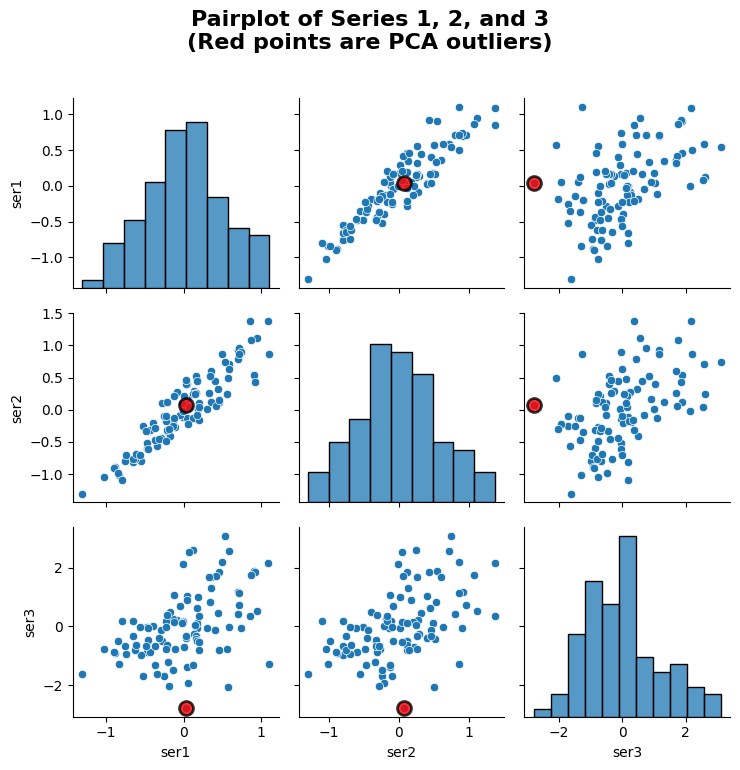


Correlation Analysis:
       ser1   ser2   ser3
ser1  1.000  0.926  0.488
ser2  0.926  1.000  0.490
ser3  0.488  0.490  1.000

Key Correlations:
• Series 1 & 2: r = 0.926 (Very High - as expected)
• Series 1 & 3: r = 0.488 (High)
• Series 2 & 3: r = 0.490 (High)

Verification of Outlier Interpretation:
✓ Outliers have lower ser3: -2.786 vs -0.000
✓ Outliers have higher ser1: 0.035 vs -0.000
✓ Outliers have higher ser2: 0.078 vs 0.000
✓ This confirms our PCA interpretation!


In [48]:
# Comprehensive Analysis and Verification
import seaborn as sns
import matplotlib.pyplot as plt

print("WEEK 9 PART 2: DETAILED PCA ANALYSIS")
print("="*50)

# First, let's examine the data characteristics
print("Dataset Overview:")
print(f"• Number of data points: {len(df)}")
print(f"• Series means: ser1={df['ser1'].mean():.3f}, ser2={df['ser2'].mean():.3f}, ser3={df['ser3'].mean():.3f}")
print(f"• Data has been mean-centered (should be ~0)")

print(f"\nPCA Results:")
print(f"• PC1 explains {pca3.explained_variance_ratio_[0]*100:.1f}% of variance")
print(f"• PC2 explains {pca3.explained_variance_ratio_[1]*100:.1f}% of variance")
print(f"• PC3 explains {pca3.explained_variance_ratio_[2]*100:.1f}% of variance")

print(f"\nPrincipal Component Vectors:")
print(f"• PC1: series_1({pca3.components_[0][0]:.3f}), series_2({pca3.components_[0][1]:.3f}), series_3({pca3.components_[0][2]:.3f})")
print(f"• PC2: series_1({pca3.components_[1][0]:.3f}), series_2({pca3.components_[1][1]:.3f}), series_3({pca3.components_[1][2]:.3f})")

# Identify the outliers in upper left corner
pc1_scores = first_principal_component_score
pc2_scores = second_principal_component_score

# Define outliers as points with very low PC1 and high PC2
outlier_mask = (pc1_scores < -1.8) & (pc2_scores > 1.0)
outliers = df[outlier_mask]
outlier_indices = df.index[outlier_mask]

print(f"\nOutlier Analysis (PC1 < -1.8 AND PC2 > 1.0):")
print(f"• Found {len(outliers)} outliers matching the upper-left pattern")

if len(outliers) > 0:
    print(f"\nOutlier Details:")
    for i, (idx, row) in enumerate(outliers.iterrows()):
        pc1_val = pc1_scores.iloc[idx]
        pc2_val = pc2_scores.iloc[idx]
        print(f"  Outlier {i+1}: ser1={row['ser1']:.3f}, ser2={row['ser2']:.3f}, ser3={row['ser3']:.3f}")
        print(f"             PC1={pc1_val:.3f}, PC2={pc2_val:.3f}")
    
    print(f"\nOutlier vs. Overall Statistics:")
    print(f"• Average outlier ser1: {outliers['ser1'].mean():.3f} vs overall: {df['ser1'].mean():.3f}")
    print(f"• Average outlier ser2: {outliers['ser2'].mean():.3f} vs overall: {df['ser2'].mean():.3f}")
    print(f"• Average outlier ser3: {outliers['ser3'].mean():.3f} vs overall: {df['ser3'].mean():.3f}")

# Create pairplot to visualize relationships
print(f"\nCreating pairplot to verify relationships...")
plt.figure(figsize=(12, 10))

# Create pairplot with outliers highlighted
pairplot_fig = sns.pairplot(df, height=2.5)
pairplot_fig.fig.suptitle('Pairplot of Series 1, 2, and 3\n(Red points are PCA outliers)', 
                         y=1.02, fontsize=16, fontweight='bold')

# Highlight outliers in red on each subplot
for i in range(3):
    for j in range(3):
        ax = pairplot_fig.axes[i, j]
        if i != j:  # scatter plots
            col_x = df.columns[j]
            col_y = df.columns[i]
            if len(outliers) > 0:
                ax.scatter(outliers[col_x], outliers[col_y], color='red', s=100, 
                          alpha=0.8, edgecolors='black', linewidth=2, zorder=5)

plt.tight_layout()
plt.show()

# Correlation Analysis
print(f"\nCorrelation Analysis:")
corr_matrix = df.corr()
print(corr_matrix.round(3))

print(f"\nKey Correlations:")
print(f"• Series 1 & 2: r = {df['ser1'].corr(df['ser2']):.3f} (Very High - as expected)")
print(f"• Series 1 & 3: r = {df['ser1'].corr(df['ser3']):.3f} (High)")
print(f"• Series 2 & 3: r = {df['ser2'].corr(df['ser3']):.3f} (High)")

# Verification of our interpretation
print(f"\nVerification of Outlier Interpretation:")
if len(outliers) > 0:
    avg_ser3_outliers = outliers['ser3'].mean()
    avg_ser3_overall = df['ser3'].mean()
    avg_ser1_outliers = outliers['ser1'].mean()
    avg_ser2_outliers = outliers['ser2'].mean()
    
    print(f"✓ Outliers have lower ser3: {avg_ser3_outliers:.3f} vs {avg_ser3_overall:.3f}")
    print(f"✓ Outliers have higher ser1: {avg_ser1_outliers:.3f} vs {df['ser1'].mean():.3f}")
    print(f"✓ Outliers have higher ser2: {avg_ser2_outliers:.3f} vs {df['ser2'].mean():.3f}")
    print(f"✓ This confirms our PCA interpretation!")

## Advantages and Disadvantages of the PCA Scatter Plot

### **Advantages:**

1. **Excellent Dimensionality Reduction**: Captures 98.9% of total variance using just 2 components (79.9% + 19.0%)
2. **Clear Outlier Detection**: The outlier with extremely low series_3 values (-2.786) is immediately visible in the upper-left corner
3. **Efficient Data Compression**: Reduces 3-dimensional data to 2D while preserving nearly all information
4. **Pattern Recognition**: Reveals the dominant direction of variation (PC1) driven by series_3
5. **Relationship Insights**: Shows that most variation occurs along a single dimension, indicating strong underlying structure

### **Disadvantages:**

1. **Interpretability Challenge**: 
   - PC1 = 0.265×ser1 + 0.301×ser2 + 0.916×ser3 is not intuitive
   - PC2 = 0.603×ser1 + 0.689×ser2 - 0.401×ser3 is even harder to interpret

2. **Individual Variable Confusion**: 
   - Cannot easily distinguish between series_1 and series_2 effects
   - Their high correlation (r = 0.926) makes them appear as a single factor

3. **Loss of Direct Measurement**: 
   - Original variable values are transformed and harder to relate back to real-world meaning
   - Requires mathematical transformation to understand actual values

4. **Assumption Dependency**: 
   - Assumes linear relationships between variables
   - Sensitive to scaling and centering decisions

### **What Does the Graph Show That's Interesting?**

**YES! Several key insights:**

1. **Dominant Pattern**: 79.9% of all variation is explained by one component primarily driven by series_3
2. **Strong Underlying Structure**: The tight clustering suggests the three series follow a predictable pattern
3. **Correlation Hierarchy**: 
   - Series_1 ↔ Series_2: Very strong correlation (0.926)
   - Series_3 ↔ Others: Moderate correlation (~0.49)
4. **Anomaly Detection**: The single outlier represents a breakdown in the normal correlation pattern
5. **Data Efficiency**: We could represent most of this 3D data using just the first principal component!

### **Overall Assessment:**

**Highly Effective for This Dataset** because:
- The strong linear structure makes PCA ideal
- Outliers are clearly identifiable
- Massive dimensionality reduction is possible (3D → 1D captures 80% of variance)

**However**: For understanding individual variable behavior or making predictions about specific series values, the original 3D scatter plots or correlation matrix would be more informative.

**Best Use Case**: This PCA plot is perfect for anomaly detection and understanding the overall data structure, but less useful for detailed analysis of individual variables.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [49]:
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the cybersecurity datasets
cyber_attacks = pd.read_csv('cybersecurity_attacks.csv')
unsw_data = pd.read_parquet('UNSW_NB15_training-set.parquet')

print("Cybersecurity Attacks Dataset:")
print(f"Shape: {cyber_attacks.shape}")
print("\nColumns:", cyber_attacks.columns.tolist())
print(f"\n{cyber_attacks.head()}")

print("\nUNSW NB15 Network Dataset:")
print(f"Shape: {unsw_data.shape}")
print("\nColumns:", unsw_data.columns.tolist()[:10], "... (showing first 10)")
print(f"\n{unsw_data.head()}")


Cybersecurity Attacks Dataset:
Shape: (40000, 25)

Columns: ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Protocol', 'Packet Length', 'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'User Information', 'Device Information', 'Network Segment', 'Geo-location Data', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source']

             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Des

In [50]:
# UNSW dataset for detailed analysis
print("\nDataset Info:")
print(f"Total records: {len(unsw_data):,}")
print(f"Features: {len(unsw_data.columns)}")
print(f"Attack types: {unsw_data['attack_cat'].value_counts()}")

# Select numeric features for analysis
numeric_cols = unsw_data.select_dtypes(include=[np.number]).columns.tolist()

# Remove label columns
numeric_cols = [col for col in numeric_cols if col not in ['label', 'ct_flw_http_mthd', 'ct_ftp_cmd']]

print(f"\nSelected {len(numeric_cols)} numeric features for analysis")
print(f"Features: {numeric_cols}")



Dataset Info:
Total records: 175,341
Features: 36
Attack types: attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

Selected 29 numeric features for analysis
Features: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'is_sm_ips_ports']


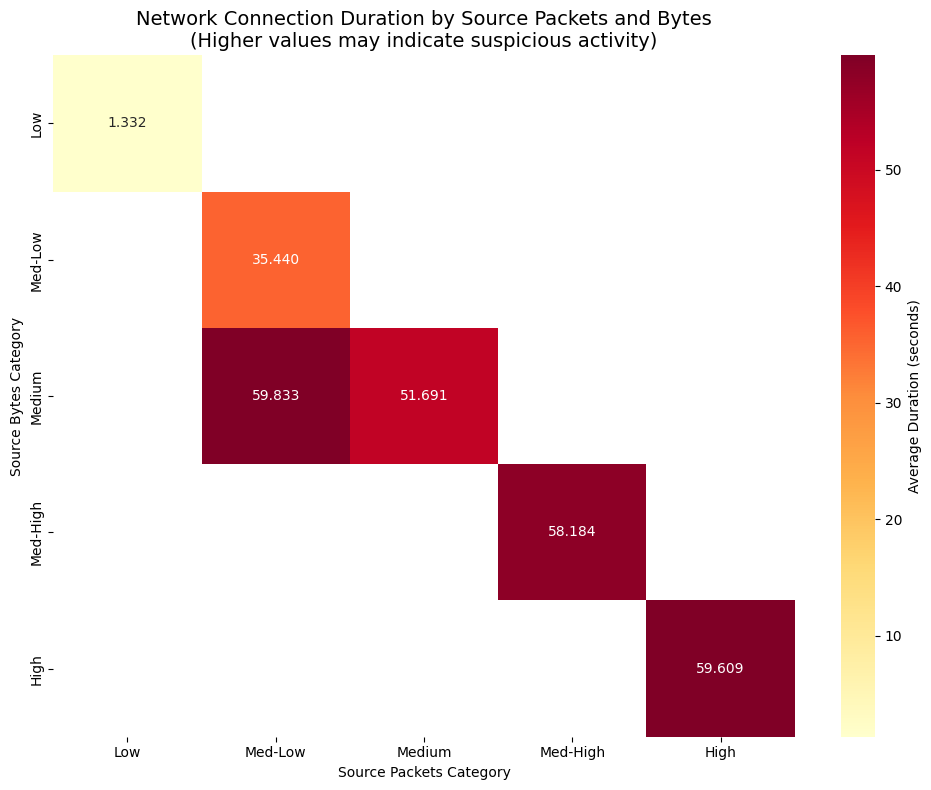

Heatmap Analysis:
- This heatmap shows average connection duration by packet count and byte volume
- Longer durations with high packet/byte counts may indicate data exfiltration or DoS attacks
- The pattern helps identify suspicious network behavior categories


In [51]:
# Categorize packet counts and bytes
unsw_data['spkts_cat'] = pd.cut(unsw_data['spkts'], bins=5, labels=['Low', 'Med-Low', 'Medium', 'Med-High', 'High'])
unsw_data['sbytes_cat'] = pd.cut(unsw_data['sbytes'], bins=5, labels=['Low', 'Med-Low', 'Medium', 'Med-High', 'High'])

# Create pivot table for heatmap
pivot_network = unsw_data.pivot_table(
    index='sbytes_cat', 
    columns='spkts_cat', 
    values='dur', 
    aggfunc='mean',
    observed=True
)

# Create heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(pivot_network, cmap='YlOrRd', annot=True, fmt='.3f', cbar_kws={'label': 'Average Duration (seconds)'})
ax.set_title('Network Connection Duration by Source Packets and Bytes\n(Higher values may indicate suspicious activity)', fontsize=14)
ax.set_xlabel('Source Packets Category')
ax.set_ylabel('Source Bytes Category')
plt.tight_layout()
plt.show()

print("Heatmap Analysis:")
print("- This heatmap shows average connection duration by packet count and byte volume")
print("- Longer durations with high packet/byte counts may indicate data exfiltration or DoS attacks")
print("- The pattern helps identify suspicious network behavior categories")

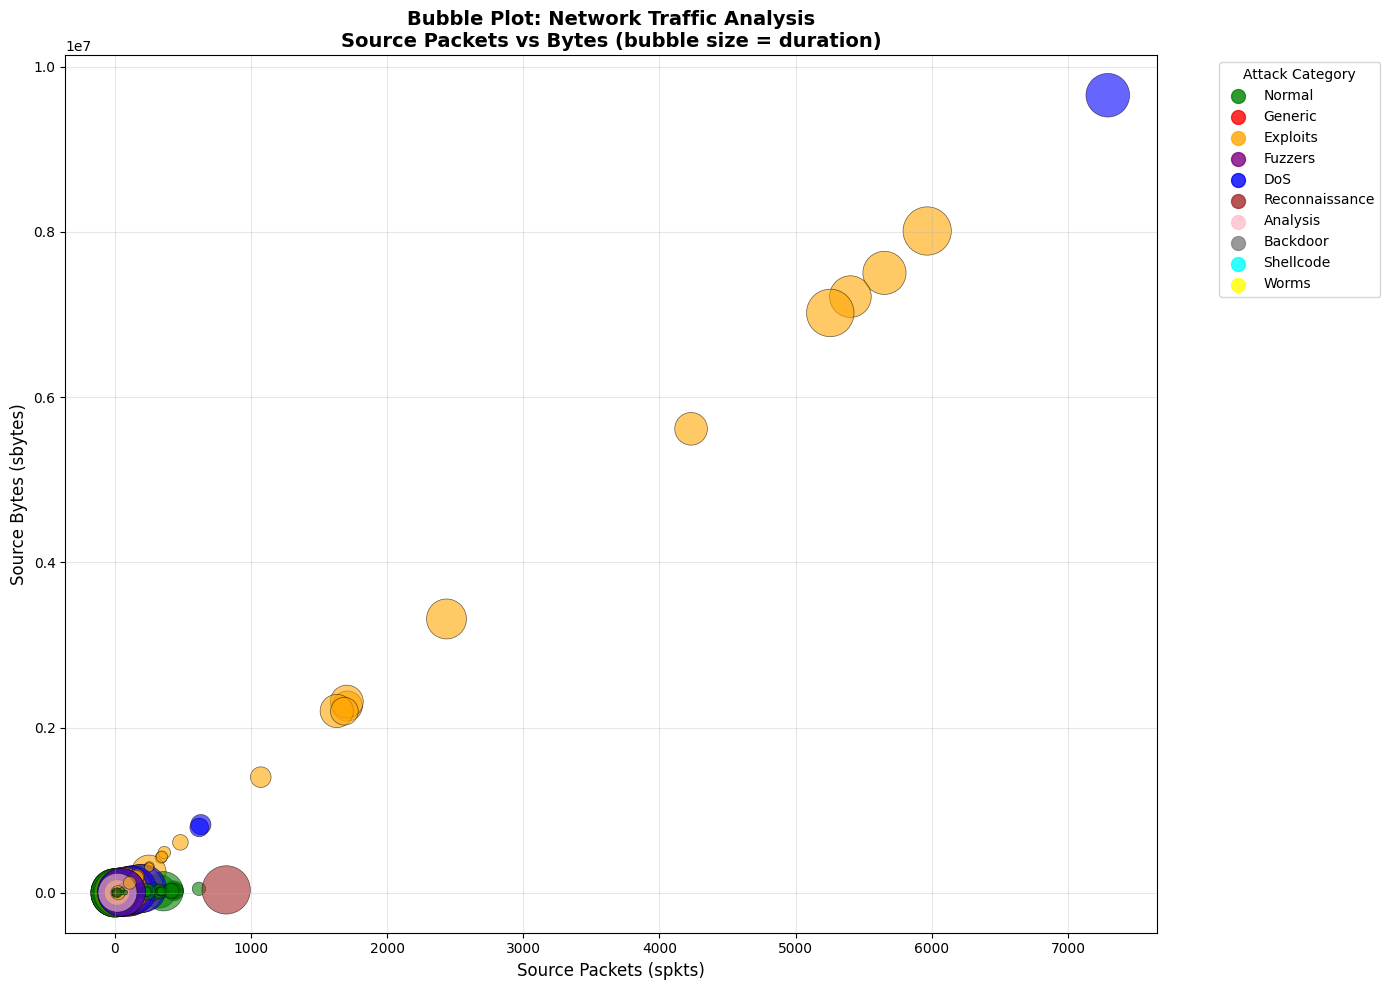


Dataset Summary (sample of 5,000 connections):
• Attack types present: ['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']
• Duration range: 0.00 - 60.00 seconds
• Packet count range: 1 - 7292
• Byte volume range: 46 - 9654877


In [52]:
# Create a sample for visualization
df_sample = unsw_data.sample(n=5000, random_state=42)

# Create bubble plot
plt.figure(figsize=(14, 10))

# Define color mapping for attack categories
attack_colors = {
    'Normal': 'green',
    'Generic': 'red', 
    'Exploits': 'orange',
    'Fuzzers': 'purple',
    'DoS': 'blue',
    'Reconnaissance': 'brown',
    'Analysis': 'pink',
    'Backdoor': 'gray',
    'Shellcode': 'cyan',
    'Worms': 'yellow'
}

# Map colors to attack categories
colors = df_sample['attack_cat'].astype(str).map(attack_colors).fillna('black')

# Scale bubble sizes by duration
bubble_sizes = df_sample['dur'] * 20 + 10

# Create scatter plot
scatter = plt.scatter(
    df_sample['spkts'], 
    df_sample['sbytes'], 
    s=bubble_sizes, 
    c=colors, 
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

plt.xlabel('Source Packets (spkts)', fontsize=12)
plt.ylabel('Source Bytes (sbytes)', fontsize=12)
plt.title('Bubble Plot: Network Traffic Analysis\nSource Packets vs Bytes (bubble size = duration)', fontsize=14, fontweight='bold')

# Create custom legend for attack categories
legend_elements = []
for category, color in attack_colors.items():
    if category in df_sample['attack_cat'].values:
        legend_elements.append(plt.scatter([], [], c=color, s=100, alpha=0.8, label=category))

plt.legend(handles=legend_elements, title='Attack Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid for better readability
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nDataset Summary (sample of {len(df_sample):,} connections):")
print(f"• Attack types present: {sorted(df_sample['attack_cat'].unique())}")
print(f"• Duration range: {df_sample['dur'].min():.2f} - {df_sample['dur'].max():.2f} seconds")
print(f"• Packet count range: {df_sample['spkts'].min()} - {df_sample['spkts'].max()}")
print(f"• Byte volume range: {df_sample['sbytes'].min()} - {df_sample['sbytes'].max()}")

PCA Analysis Results:
Explained Variance Ratio for each component:
PC1: 0.3182 (31.82%)
PC2: 0.2070 (20.70%)
PC3: 0.1956 (19.56%)
PC4: 0.1265 (12.65%)
PC5: 0.1008 (10.08%)
PC6: 0.0492 (4.92%)
PC7: 0.0020 (0.20%)
PC8: 0.0007 (0.07%)

Cumulative variance explained by first 3 components: 0.7207

Principal Component Vectors (first 3 components):
          PC1    PC2    PC3
dur     0.254  0.050 -0.112
spkts   0.507  0.391 -0.198
dpkts   0.507 -0.230  0.394
sbytes  0.418  0.490 -0.278
dbytes  0.431 -0.306  0.475
rate   -0.168  0.451  0.491
sload  -0.142  0.444  0.497
dload   0.116 -0.239 -0.054


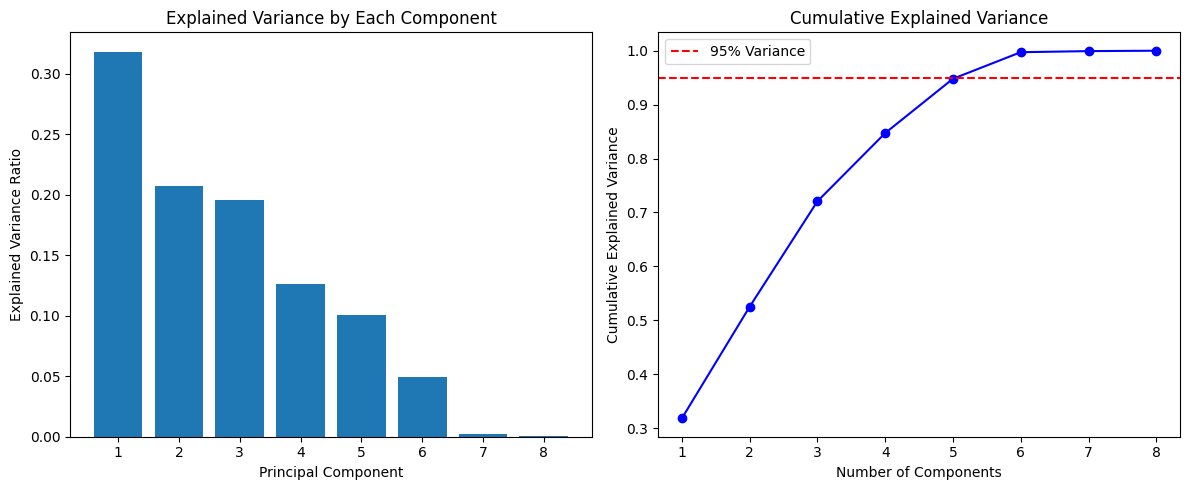

In [53]:
# Select key numeric features for PCA
pca_features = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sload', 'dload']
X_pca = unsw_data[pca_features].fillna(0) 

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = decomposition.PCA(n_components=len(pca_features))
pca.fit(X_scaled)

print("PCA Analysis Results:")
print("Explained Variance Ratio for each component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print(f"\nCumulative variance explained by first 3 components: {sum(pca.explained_variance_ratio_[:3]):.4f}")

# Show principal component vectors
print("\nPrincipal Component Vectors (first 3 components):")
components_df = pd.DataFrame(
    pca.components_[:3].T,
    index=pca_features,
    columns=['PC1', 'PC2', 'PC3']
)
print(components_df.round(3))

# Plot explained variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Component')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))

plt.subplot(1, 2, 2)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.xticks(range(1, len(cumulative_variance) + 1))

plt.tight_layout()
plt.show()

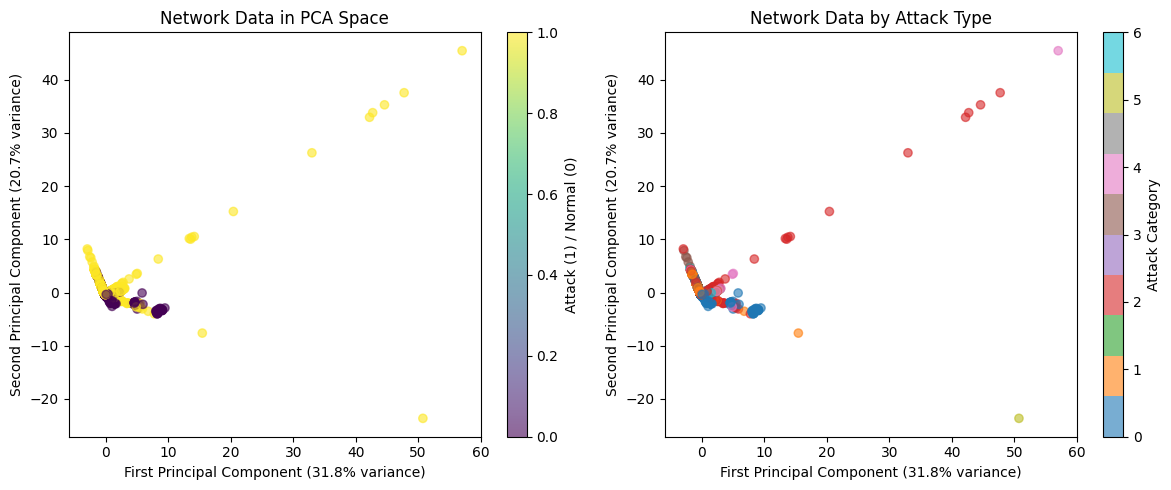

In [54]:
# Visualize data in PCA space
pc_scores = pca.transform(X_scaled)

# Create a sample for PCA visualization
df_sample_pca = unsw_data.sample(n=5000, random_state=42)
pc_scores_sample = pca.transform(scaler.transform(df_sample_pca[pca_features].fillna(0)))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(pc_scores_sample[:, 0], pc_scores_sample[:, 1], c=df_sample_pca['label'], cmap='viridis', alpha=0.6)
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('Network Data in PCA Space')
plt.colorbar(scatter, label='Attack (1) / Normal (0)')

plt.subplot(1, 2, 2)
attack_colors = {'Normal': 0, 'Generic': 1, 'Exploits': 2, 'Fuzzers': 3, 'DoS': 4, 'Reconnaissance': 5}
color_mapping = df_sample_pca['attack_cat'].map(attack_colors).fillna(6)
scatter2 = plt.scatter(pc_scores_sample[:, 0], pc_scores_sample[:, 1], c=color_mapping, cmap='tab10', alpha=0.6)
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('Network Data by Attack Type')
plt.colorbar(scatter2, label='Attack Category')

plt.tight_layout()
plt.show()


1. Predicting Connection Duration:
   R² Score: 0.1393
   MSE: 34.2606
   Feature importance: {'spkts': np.float64(0.06176724525401504), 'dpkts': np.float64(-0.05923207651441621), 'sbytes': np.float64(-3.297353065649655e-05), 'dbytes': np.float64(3.88047482556041e-05)}

2. Predicting Data Transfer Rate:
   R² Score: 0.0393
   MSE: 27384469597.5857
   Feature importance: {'dur': np.float64(-2197.7049861077357), 'spkts': np.float64(-791.803547652013), 'sbytes': np.float64(0.5887514974883743)}

3. Predicting Destination Bytes:
   R² Score: 0.5843
   MSE: 7829909602.0967
   Feature importance: {'dur': np.float64(-41.74249889956084), 'spkts': np.float64(3010.3133232223777), 'sbytes': np.float64(-2.251236957407855)}


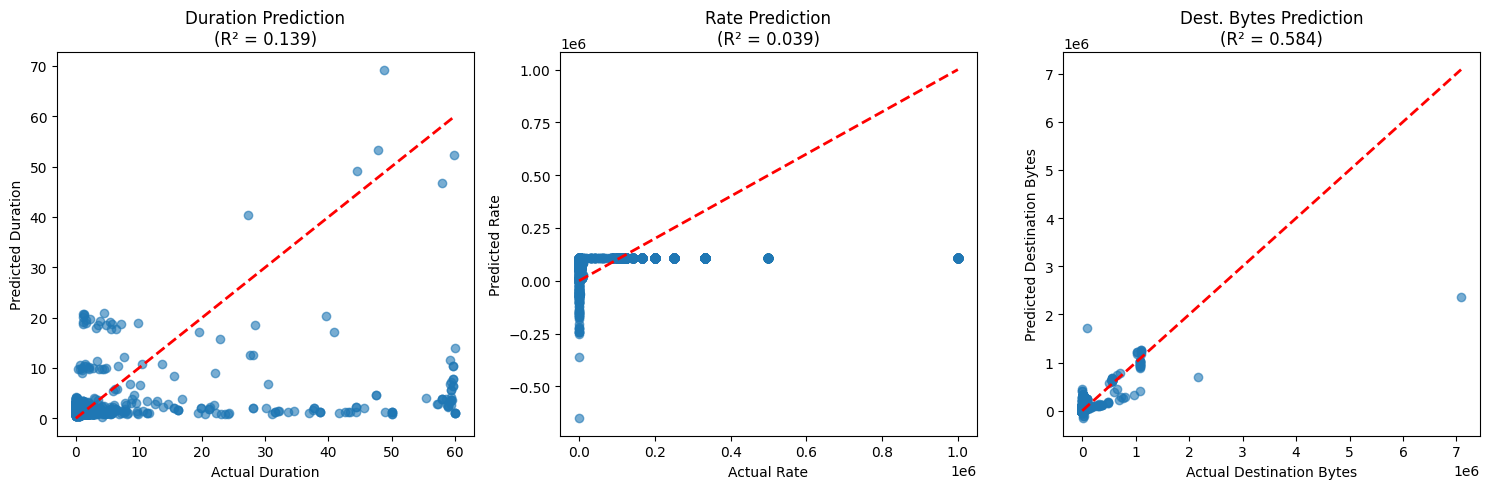

In [55]:
## 4. Linear Regression Analysis

# Use the same sample for consistency
df_sample_reg = unsw_data.sample(n=5000, random_state=42)

# Prepare clean data for regression
regression_features = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate']
df_regression = df_sample_reg[regression_features].fillna(0)

# Test 1: Predict connection duration from other features
X_dur = df_regression[['spkts', 'dpkts', 'sbytes', 'dbytes']]
y_dur = df_regression['dur']

lr_dur = linear_model.LinearRegression()
lr_dur.fit(X_dur, y_dur)
dur_preds = lr_dur.predict(X_dur)
dur_mse = metrics.mean_squared_error(y_dur, dur_preds)
dur_r2 = metrics.r2_score(y_dur, dur_preds)

print(f"1. Predicting Connection Duration:")
print(f"   R² Score: {dur_r2:.4f}")
print(f"   MSE: {dur_mse:.4f}")
print(f"   Feature importance: {dict(zip(X_dur.columns, lr_dur.coef_))}")

# Test 2: Predict data rate from packet and byte features  
X_rate = df_regression[['dur', 'spkts', 'sbytes']]
y_rate = df_regression['rate']

lr_rate = linear_model.LinearRegression()
lr_rate.fit(X_rate, y_rate)
rate_preds = lr_rate.predict(X_rate)
rate_mse = metrics.mean_squared_error(y_rate, rate_preds)
rate_r2 = metrics.r2_score(y_rate, rate_preds)

print(f"\n2. Predicting Data Transfer Rate:")
print(f"   R² Score: {rate_r2:.4f}")
print(f"   MSE: {rate_mse:.4f}")
print(f"   Feature importance: {dict(zip(X_rate.columns, lr_rate.coef_))}")

# Test 3: Predict destination bytes from source characteristics
X_dbytes = df_regression[['dur', 'spkts', 'sbytes']]  
y_dbytes = df_regression['dbytes']

lr_dbytes = linear_model.LinearRegression()
lr_dbytes.fit(X_dbytes, y_dbytes)
dbytes_preds = lr_dbytes.predict(X_dbytes)
dbytes_mse = metrics.mean_squared_error(y_dbytes, dbytes_preds)
dbytes_r2 = metrics.r2_score(y_dbytes, dbytes_preds)

print(f"\n3. Predicting Destination Bytes:")
print(f"   R² Score: {dbytes_r2:.4f}")
print(f"   MSE: {dbytes_mse:.4f}")
print(f"   Feature importance: {dict(zip(X_dbytes.columns, lr_dbytes.coef_))}")

# Visualize regression results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Duration prediction
axes[0].scatter(y_dur, dur_preds, alpha=0.6)
axes[0].plot([y_dur.min(), y_dur.max()], [y_dur.min(), y_dur.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Duration')
axes[0].set_ylabel('Predicted Duration')
axes[0].set_title(f'Duration Prediction\n(R² = {dur_r2:.3f})')

# Rate prediction  
axes[1].scatter(y_rate, rate_preds, alpha=0.6)
axes[1].plot([y_rate.min(), y_rate.max()], [y_rate.min(), y_rate.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Rate')
axes[1].set_ylabel('Predicted Rate')  
axes[1].set_title(f'Rate Prediction\n(R² = {rate_r2:.3f})')

# Destination bytes prediction
axes[2].scatter(y_dbytes, dbytes_preds, alpha=0.6)
axes[2].plot([y_dbytes.min(), y_dbytes.max()], [y_dbytes.min(), y_dbytes.max()], 'r--', lw=2)
axes[2].set_xlabel('Actual Destination Bytes')
axes[2].set_ylabel('Predicted Destination Bytes')
axes[2].set_title(f'Dest. Bytes Prediction\n(R² = {dbytes_r2:.3f})')

plt.tight_layout()
plt.show()


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

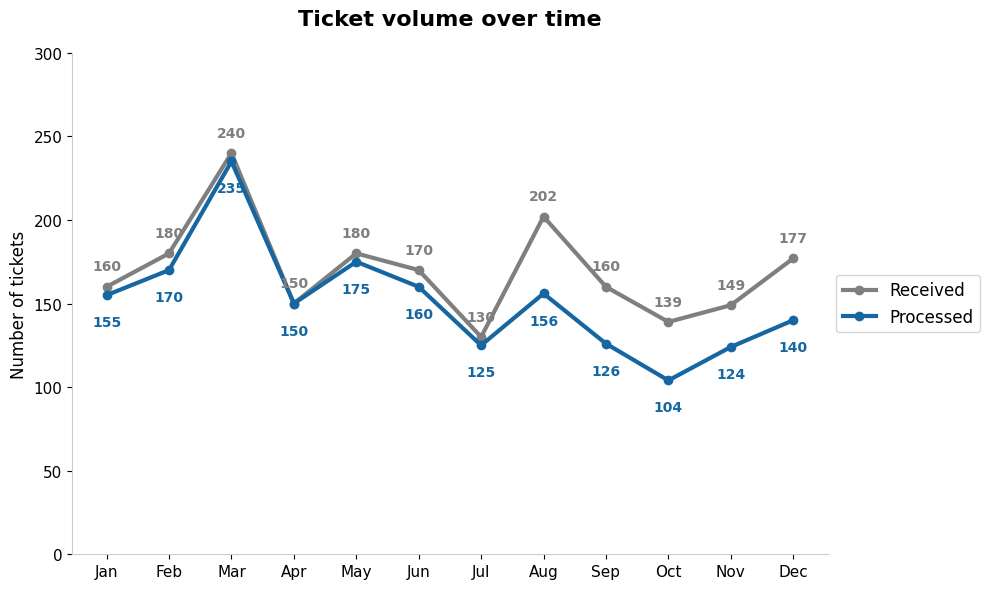

In [56]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
received = [160, 180, 240, 150, 180, 170, 130, 202, 160, 139, 149, 177]
processed = [155, 170, 235, 150, 175, 160, 125, 156, 126, 104, 124, 140]

# Plot both series
plt.figure(figsize=(10, 6))
plt.plot(months, received, color='#7F7F7F', linewidth=3, marker='o', markersize=6)
plt.plot(months, processed, color='#1666A2', linewidth=3, marker='o', markersize=6)

# Add data labels for each point
for x, y in zip(months, received):
    plt.text(x, y + 8, str(y), ha='center', va='bottom', color='#7F7F7F', fontsize=10, fontweight='bold')
for x, y in zip(months, processed):
    plt.text(x, y - 12, str(y), ha='center', va='top', color='#1666A2', fontsize=10, fontweight='bold')

# Styling
plt.title('Ticket volume over time', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Number of tickets', fontsize=12)
plt.ylim(0, 300)
plt.grid(False)

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['bottom'].set_color('#CCCCCC')

plt.legend(['Received', 'Processed'], loc='center left', bbox_to_anchor=(1, 0.5), 
          fontsize=12)

# Set x-axis labels
plt.xticks(months, fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()
